In [1]:
import pandas as pd
import numpy as np
import biosppy
import biosppy.signals 
import scipy


In [2]:
import matplotlib.pyplot as plt

In [85]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = scipy.signal.lfilter(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = scipy.signal.lfilter(b, a, data)
    return y

def bandPassfilter(signal):
 
 fs=55
 lowcut=0.5
 highcut=25
 y = butter_lowpass_filter(signal,22,55, order=5)
 y = butter_highpass_filter(signal,0.005,55, order=5)
 nyq=0.5* fs
 low=lowcut/nyq
 high=highcut/nyq

 order=4
 b,a =scipy.signal.butter(order,[low,high],'bandpass',analog= False)
 y=scipy.signal.filtfilt(b,a,signal,axis=0)
 return y 

In [77]:
grp = pd.read_excel('C:\\Users\\YOGHES WARAN\\OneDrive\\Desktop\\New folder\\part4_ppg.xlsx');
grp1 = pd.read_excel('C:\\Users\\YOGHES WARAN\\OneDrive\\Desktop\\New folder\\part2.xlsx');
grp2= pd.read_excel('C:\\Users\\YOGHES WARAN\\OneDrive\\Desktop\\New folder\\part4.xlsx');


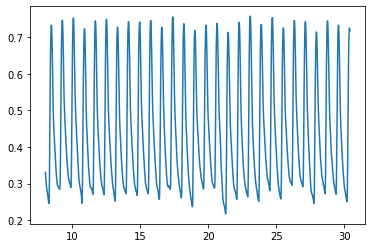

In [86]:
no=np.array(grp['time'])
n=0.09*np.cos(30*2*np.pi*no)+0.2*np.sin(40*2*np.pi*no)+0.5*np.sin(0.1*2*np.pi*no)
p=np.array(grp['ppg'])
maximum=max(p)
p=p[1000:3800]
t=grp['time']
t=t[1000:3800]
plt.plot(t,p)

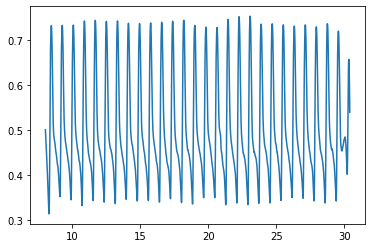

In [87]:
filtered_signal=bandPassfilter(p)
filtered_signal=filtered_signal
filtered_signal=filtered_signal+0.5
plt.plot(t,filtered_signal)

In [ ]:
peak1=biosppy.signals.ecg.christov_segmenter(signal=filtered_signal, sampling_rate=125)
peak=biosppy.signals.ecg.christov_segmenter(signal=grp['ppg'], sampling_rate=125)
a=filtered_signal[peak[0][2]]